In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [7]:
jfrac = np.load('test_fractal_2.npz')['test']

In [8]:
def downsizing_sum(a, factors):    
    """
    `a` is the N-dim input array
    `factors` is the blocksize on which averaging is to be performed
    """

    factors = np.asanyarray(factors)
    sh = np.column_stack([a.shape//factors, factors]).ravel()
    b = a.reshape(sh).sum(tuple(range(1, 2*a.ndim, 2)))

    return b

In [ ]:
def entropyinter(frac):
    ''' Entropie proposée par François Semecurbe
        Questions pour localiser une paire de personne 
        Mesure de la ségregation'''
    frac[:,:,0] = frac[:,:,0] / np.sum(frac[:,:,0])
    frac[:,:,1] = frac[:,:,1] / np.sum(frac[:,:,1])
    P = frac[:,:,0] * frac[:,:,1]
    P = P / np.sum(P)
    return(-np.sum(P*np.log2(P)))

In [37]:
def entropy_segregation( frac):
    ptot = np.sum(frac, axis=2)
    Prob = frac / ptot[:, :, np.newaxis]
    #print(Prob[1,1,:])
    P0 = np.sum(frac[:,:,0]) / np.sum(frac[:,:,0] +  frac[:,:,1])
    P1 = np.sum(frac[:,:,1]) / np.sum(frac[:,:,0] +  frac[:,:,1])
    Entropie_globale = -np.log2(P0)*P0 -np.log2(P1)*P1   
    return(Entropie_globale + np.sum(np.sum(np.log2(Prob) * Prob, axis=2) * ptot) / np.sum(ptot)  )

In [3]:
def renyiq(frac,q=2): 
    return(np.log(np.sum(frac[:,:,0]**q * frac[:,:,1]**q)))

### Mise en oeuvre

In [25]:
frac = jfrac[8]


In [26]:
res = np.array([1,2,4,8,16,32])

In [30]:
entropies= [entropy_segregation(downsizing_sum(frac, (resi, resi, 1))) for resi in res]

[0.41251254 0.58748746]
[0.4141074 0.5858926]
[0.28411126 0.71588874]
[0.1471217 0.8528783]
[0.15354599 0.84645396]
[0.09068837 0.90931165]


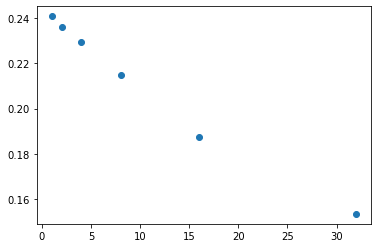

In [32]:
plt.scatter((res), entropies)

In [ ]:
reg = LinearRegression().fit(np.log2(res).reshape(-1, 1), entropies)
reg.coef_

### Variation en fonction de l

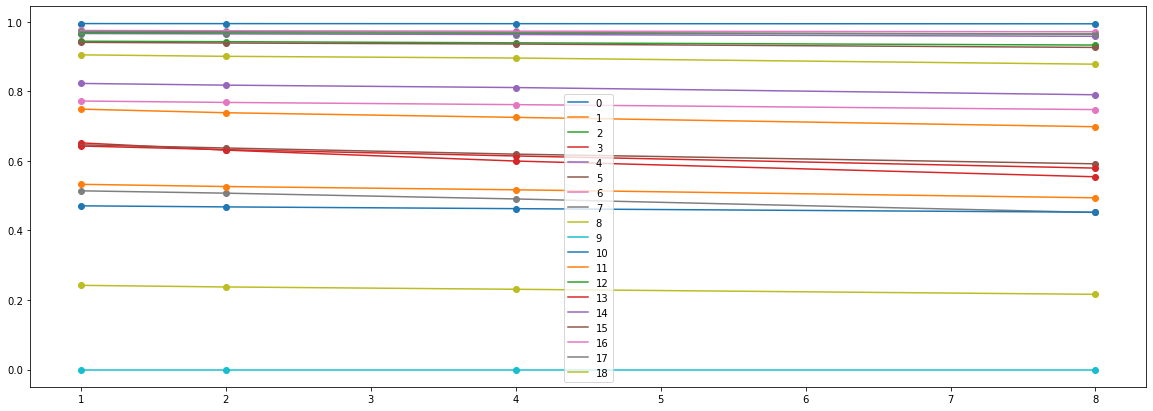

In [44]:
res = np.array([1,2,4,8])

plt.figure(figsize=(20, 7))
for j in range(jfrac.shape[0]):
    frac = jfrac[j]
    frac[:,:,0] = frac[:,:,0] / np.sum(frac[:,:,0])
    frac[:,:,1] = frac[:,:,1] / np.sum(frac[:,:,1])
    entropies= [entropy_segregation(downsizing_sum(frac, (resi, resi, 1))) for resi in res]
    #plt.scatter(np.log2(res), entropies)
    plt.scatter(res, entropies)
    plt.plot(res, entropies, label=j)
    plt.legend()

    #reg = LinearRegression().fit(np.log2(res).reshape(-1, 1), entropies)
    

In [ ]:
plt.scatter(np.log2(res), entropies)

In [ ]:
plt.imshow(toto[1,:,:])
plt.show()

In [ ]:
plt.imshow(np.log(jfrac[18,:,:,0]*jfrac[18,:,:,1]))

In [ ]:
plt.imshow(np.log(jfrac[1,:,:,0]*jfrac[1,:,:,1]))

In [ ]:
plt.hist(np.log(jfrac[18,:,:,0]*jfrac[18,:,:,1]))

In [ ]:
plt.hist(np.log(jfrac[1,:,:,0]*jfrac[1,:,:,1]))